In [1]:
#機械学習帳Chap4
#Reference:https://chokkan.github.io/mlnote/regression/04sgd.html

In [2]:
include("../src/Type/method_parameter.jl")
include("../src/Regression/linear_regression.jl")
include("../src/Regression/ridge_regression.jl")
using LinearAlgebra
using Printf
using Plots

In [3]:
# 線形回帰分析
let
    # data
    xs = [1, 3, 6, 8]
    ys = [3, 6, 5, 7]
    X = [x^j for x in xs, j = 0:1]
    X_T = transpose(X)
    
    ϵ = 1e-4
    vabs(grad) = sum(abs.(grad))
    
    # 最急降下法による推定
    ηconst(t) = 0.001 #学習率は固定
    w_gd = linear_regression(X, ys, GD(zeros(2), t->0.001, 1e-4, 10_000))
    println("GD   :W=$w_gd")
    
    # 導関数を0とおいて解く
    w_diff0 = linear_regression(X, ys, Diff0())
    println("Diff0:W=$w_diff0")
    
    # 確率的勾配降下法による推定
    w_sgd = linear_regression(X, ys, SGD(zeros(2), t->0.03/sqrt(1+t), 1e-4, 40_000))
    println("SGD  :W=$w_sgd")
end

GD   :W=[3.310303082536587, 0.4310413781314173]
Diff0:W=[3.3103448275862064, 0.43103448275862055]
SGD  :W=[0.3102673032824016, 0.836216231490499]


 (SGD) w=[0.3664317094880993, 2.197618600538299, -3.441508242482617, -2.8322682163678237, -1.3201612560371894, -0.03145425783027857, 0.8437153910949458, 1.3432883111426417, 1.554472331810895, 1.5625776086517669]
 (Diff0) w=[0.14436532420792603, 5.9260880606841315, -11.524269753211989, -4.0760476825319, 2.2587655079670057, 4.7943323082911, 4.494581009863609, 2.4737527970864193, -0.4833167900099369, -3.87989758296375]


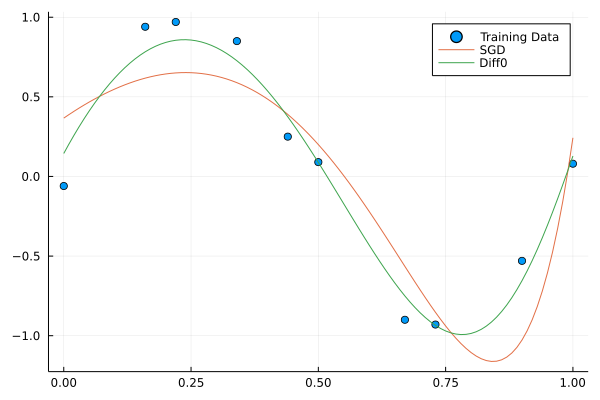

In [4]:
# リッジ回帰
let
    xs = [ 0.  ,  0.16,  0.22,  0.34,  0.44,  0.5 ,  0.67,  0.73,  0.9 ,  1.  ]
    ys = [-0.06,  0.94,  0.97,  0.85,  0.25,  0.09, -0.9 , -0.93, -0.53,  0.08]
    α = 10^(-3)
    Dim = 9
    X = [x^j for x in xs, j = (0:Dim)]

    #確率的勾配降下法
    w_sgd = ridge_regression(X, ys, α, SGD(zeros(Dim+1), t->1/sqrt(1+t), 1e-4, 50_000))
    println(" (SGD) w=$w_sgd")
    
    #導関数を0とおいて解く
    w_diff0 = ridge_regression(X, ys, α, Diff0())
    println(" (Diff0) w=$w_diff0")
    
    #グラフ描画
    scatter(xs, ys, label="Training Data")
    f(x,w) = sum([x^(j-1) * w[j] for j = (1:length(w))])
    plot!((0.0:0.01:1.0), x->f(x,w_sgd), label="SGD")
    plot!((0.0:0.01:1.0), x->f(x,w_diff0), label="Diff0")
end